# Data Manipulation

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

magic = pd.read_csv('magic04.data', sep = ',', header = None)
display(magic.head())

magic_names = pd.read_csv('magic04.names', sep = "\t")

magic.columns = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']

#pd.get_dummies(magic['class']); can also use label encoding to create only 1 and 0
magic['class'] = magic['class'].astype('category')
display(magic.dtypes)

#Splitting features and response variable
X = magic.drop(['class'], axis = 1)
Y = magic['class']

#Making Y binary
Y_dummy = pd.get_dummies(Y)
Y = pd.concat((Y_dummy, Y), axis = 1)
Y = Y.drop(['class'], axis = 1)
Y = Y.drop(['h'], axis = 1)
Y = np.asarray(Y)
Y = Y.reshape((len(Y), ))
display(Y)

#Scaling X
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size = .25, random_state = 10)

,0,1,2,3,4,5,6,7,8,9,10
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


fLength      float64
fWidth       float64
fSize        float64
fConc        float64
fConc1       float64
fAsym        float64
fM3Long      float64
fM3Trans     float64
fAlpha       float64
fDist        float64
class       category
dtype: object

array([1, 1, 1, ..., 0, 0, 0], dtype=uint8)

# Linear Regression

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import sklearn.model_selection as ms
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#Logistic Regression
logistic_model = LogisticRegression(solver = 'liblinear', random_state = 10)
logistic_model.fit(XTrain, YTrain)

logistic_predict = logistic_model.predict(XTest)
print(logistic_predict)

[1 1 0 ... 0 1 1]


### LDA

In [7]:
lda = LinearDiscriminantAnalysis()
grid_lda = [{'solver': ('lsqr', 'eigen'), 'n_components': (1,10)}]

lda_model = GridSearchCV(estimator = lda, param_grid = grid_lda, scoring = 'accuracy', cv = ms.KFold(n_splits = 3))

lda_model.fit(XTrain, YTrain)

print(lda_model.best_params_)

lda_model_best = LinearDiscriminantAnalysis(n_components = 1, solver = 'lsqr')
lda_model_best.fit(XTrain, YTrain)

lda_prediction = lda_model_best.predict(XTest)

{'n_components': 1, 'solver': 'lsqr'}


C:\Users\Camer\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
6 fits failed out of a total of 12.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Camer\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Camer\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py", line 582, in fit
    raise ValueError(
ValueError: n_components cannot be larger than min(n_features, n_classes - 1).

  warnings.warn(some_fits_failed_message, FitFailedWarning)
C:\Users\Camer\Anaconda\lib\site-packages\sklearn\

### KNN

In [6]:
knn = KNeighborsClassifier()

neighbors = np.arange(1, 21, step = 2)
grid_knn = [{'n_neighbors': neighbors}]

knn_model = GridSearchCV(estimator = knn, param_grid = grid_knn, cv = ms.KFold(n_splits = 5))

knn_model.fit(XTrain, YTrain)
print(knn_model.best_params_)

knn_best_model = KNeighborsClassifier(n_neighbors = 13)
knn_best_model.fit(XTrain, YTrain)

knn_predict = knn_best_model.predict(XTest)

{'n_neighbors': 13}


### Linear SVM

In [5]:
svm_ = svm.SVC()

grid_lSVM = [{'C': [.01, .1, 1, 10]}]
svm_model = GridSearchCV(estimator = svm_, param_grid = grid_lSVM, cv = ms.KFold(n_splits = 5))

svm_model.fit(XTrain, YTrain)
print(svm_model.best_params_)

svm_model_best = svm.SVC(C = 10)
svm_model_best.fit(XTrain, YTrain)
svm_pred = svm_model.predict(XTest)

{'C': 10}


### Gaussian (Radial) SVM

In [12]:
svm_gauss = svm.SVC(C = 10, kernel = 'rbf', gamma = .1)
svm_gauss.fit(XTrain, YTrain)

svm_gauss_pred = svm_gauss.predict(XTest)
print(np.sum(svm_gauss_pred == YTest) / len(YTest))
#Manually found that best accuracy occurs at gamma = .1

0.86267087276551


# Testing accuracy

array([[-1.29081564, -0.07279753, -0.28011442,  0.05083055, -0.58076355,
        -0.00588448,  0.38731288,  0.02066414, -1.21676634, -0.04806767]])

[-0.57722602 -0.33680419 -0.38113037  0.06275933 -0.14892271  0.54104236
  0.22481824 -0.40584194  0.47681587 -1.49786555]


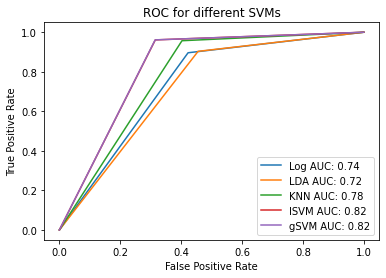

In [17]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr_log, tpr_log, _ = roc_curve(YTest, logistic_predict)
auc_log = auc(fpr_log, tpr_log)

fpr_lda, tpr_lda, _ = roc_curve(YTest, lda_prediction)
auc_lda = auc(fpr_lda, tpr_lda)

fpr_knn, tpr_knn, _ = roc_curve(YTest, knn_predict)
auc_knn = auc(fpr_knn, tpr_knn)

fpr_lSVM, tpr_lSVM, _ = roc_curve(YTest, svm_pred)
auc_lSVM = auc(fpr_lSVM, tpr_lSVM)

fpr_gSVM, tpr_gSVM, _ = roc_curve(YTest, svm_gauss_pred)
auc_gSVM = auc(fpr_gSVM, tpr_gSVM)

plt.plot(fpr_log, tpr_log, label = 'Log AUC: {0:0.2f}'.format(auc_log))
plt.plot(fpr_lda, tpr_lda, label = 'LDA AUC: {0:0.2f}'.format(auc_lda))
plt.plot(fpr_knn, tpr_knn, label = 'KNN AUC: {0:0.2f}'.format(auc_knn))
plt.plot(fpr_lSVM, tpr_lSVM, label = 'lSVM AUC: {0:0.2f}'.format(auc_lSVM))
plt.plot(fpr_gSVM, tpr_gSVM, label = 'gSVM AUC: {0:0.2f}'.format(auc_gSVM))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for different SVMs')
plt.legend(loc = 'lower right')

display(logistic_model.coef_)
#Based on the coefficients of the logistic regression model, it appears that fLength is the most important predictor

#Support Vector Machine appears to be the most accurate for this data